## 제주도 핫 플레이스 관련 지도 그리기

In [1]:
# 한글 폰트 설치

In [2]:
!apt-get install -y fonts-nanum > /dev/null
!fc-cache -fv > /dev/null
!rm -rf ~/.chache/matplotlib > /dev/null
#런타임 다시 시작

# 1. 데이터 준비

In [4]:
#파일 업로드
from google.colab import files

#files.upload(), 파일 업로드
uploaded = files.upload() 

#list()안에 uploaded.keys()함수의 결과의 첫번째 값 가져오기
filename = list(uploaded.keys())[0]


Saving 제주핫플레이스.csv to 제주핫플레이스 (1).csv


In [8]:
import pandas as pd
import numpy as np

# csv 파일에서 데이터 프레임 생성, pd.read_csv()
raw_df = pd.read_csv(filename) 
raw_df.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


## 데이터 프레임 기본 함수 및 내용




In [12]:
# 생성

#np.arange()로 전체 데이터 프레임 크기(값들만), reshape()로 데이터 프레임 형태 정의
data = {
    "2015": [9904312, 3448737, 2890451, 2466052], # 열1, 시리즈( 딕셔너리와 같다)
    "2010": [9631482, 3393191, 2632035, 2431774], # 열2, 시리즈
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}

data = np.arange(24).reshape(4,6)
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]

#pd.DataFrame(시리즈  or 딕셔너리 데이터, index = 행인덱스, columns = 열인덱스)
df = pd.DataFrame(data, index=index, columns=columns)
df

,지역,2015,2010,2005,2000,2010-2015 증가율
서울,0,1,2,3,4,5
부산,6,7,8,9,10,11
인천,12,13,14,15,16,17
대구,18,19,20,21,22,23


In [25]:
data = {
    "2015": [9904312, 3448737, 2890451, 2466052], # 열1, 시리즈( 딕셔너리와 같다)
    "2010": [9631482, 3393191, 2632035, 2431774], # 열2, 시리즈
    "2005": [9762546, 3512547, 2517680, 2456016],
    "2000": [9853972, 3655437, 2466338, 2473990],
    "지역": ["수도권", "경상권", "수도권", "경상권"],
    "2010-2015 증가율": [0.0283, 0.0163, 0.0982, 0.0141]
}
columns = ["지역", "2015", "2010", "2005", "2000", "2010-2015 증가율"]
index = ["서울", "부산", "인천", "대구"]

#pd.DataFrame(시리즈  or 딕셔너리 데이터, index = 행인덱스, columns = 열인덱스)
df = pd.DataFrame(data, index=index, columns=columns)
df


,지역,2015,2010,2005,2000,2010-2015 증가율
서울,수도권,9904312,9631482,9762546,9853972,0.0283
부산,경상권,3448737,3393191,3512547,3655437,0.0163
인천,수도권,2890451,2632035,2517680,2466338,0.0982
대구,경상권,2466052,2431774,2456016,2473990,0.0141


In [26]:
df.지역.values # df.'컬럼명'.values, 열인덱스 이름으로 열값 확인, 행은 불가능

array(['수도권', '경상권', '수도권', '경상권'], dtype=object)

In [21]:
df['2015'].values


array([9904312, 3448737, 2890451, 2466052])

In [22]:
type(df['2015'])

pandas.core.series.Series

In [23]:
#만약 하나의 열만 빼내면서 데이터프레임 자료형을 유지하고 싶다면 
#원소가 하나인 리스트를 써서 인덱싱하면 된다.
df[['2015']]

,2015
서울,9904312
부산,3448737
인천,2890451
대구,2466052


In [24]:
type(df[['2015']])

pandas.core.frame.DataFrame

In [17]:
df.columns

Index(['지역', '2015', '2010', '2005', '2000', '2010-2015 증가율'], dtype='object')

In [27]:
# 제주

In [28]:
location_counts = raw_df.place.value_counts().to_frame()
print(location_counts.shape)
location_counts.head()

(1027, 1)


,place
Jeju,241
Jeju-do,172
Jungle Book by Alice,101
Seogwipo,65
제주도 크리스마스 박물관,59


In [29]:
location_counts.tail()

,place
돼지촌,1
리틀이태리 비스트로,1
여수 앞바다,1
Ocean Suite Jeju Hotel (오션스위츠제주호텔),1
CAMPHORTREE Hotel & Resort,1


In [30]:
location_counts.to_csv('location_counts.csv')


In [40]:

loc_df = pd.read_csv('location_counts.csv')
loc_df.columns = ['지명','빈도']
print(loc_df.shape)
loc_df.head()

(1027, 2)


,지명,빈도
0,Jeju,241
1,Jeju-do,172
2,Jungle Book by Alice,101
3,Seogwipo,65
4,제주도 크리스마스 박물관,59


## 2. 카카오 검색 API를 이용한 장소 검색
- 키워드 장소 검색

In [32]:
uploaded = files.upload()
filename = list(uploaded.keys())[0]

Saving kakaoapikey.txt to kakaoapikey.txt


In [33]:
with open(filename) as f:
    api_key = f.read()


In [34]:
import requests
from urllib.parse import quote

In [35]:
keyword = '정방폭포'
search_url = 'https://dapi.kakao.com/v2/local/search/keyword.json'
url = f'{search_url}?query={quote(keyword)}'
# Authorization: KakaoAK {REST_API_KEY}
result = requests.get(url,
            headers={"Authorization": f'KakaoAK {api_key}'}).json()
result['documents'][0]


{'address_name': '제주특별자치도 서귀포시 동홍동 299-3',
 'category_group_code': '',
 'category_group_name': '',
 'category_name': '여행 > 관광,명소 > 폭포',
 'distance': '',
 'id': '10717401',
 'phone': '064-733-1530',
 'place_name': '정방폭포',
 'place_url': 'http://place.map.kakao.com/10717401',
 'road_address_name': '',
 'x': '126.571605283591',
 'y': '33.2449966137286'}

In [36]:
import numpy as np
import re

In [37]:

def find_place(keyword):
    url = f'{search_url}?query={quote(keyword)}'
    result = requests.get(url,
                headers={"Authorization": f'KakaoAK {api_key}'}).json()
    try:
        name = result['documents'][0]['place_name']
        if '제주특별자치도' not in result['documents'][0]['address_name']:
            lng = np.nan
            lat = np.nan
        else:
            lng = float(result['documents'][0]['x'])
            lat = float(result['documents'][0]['y'])
    except:
        print(keyword)
        name = ''
        lng = np.nan
        lat = np.nan

    return name, lng, lat, keyword

In [38]:

find_place('구좌지앵')

('구좌지앵', 126.90617413482926, 33.49540702573199, '구좌지앵')

In [39]:
re.sub('[^ㄱ-ㅎㅏ-ㅣ가-힣0-9 ]', '', '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地')

'제주도 서귀포 중문관광단지 '

In [41]:
# loc_df에 공식명칭, 위도, 경도 정보 추가
name_list, lng_list, lat_list = [],[],[]
for place in loc_df.지명:
    place = re.sub('[^가-힣0-9 ]', '', place).strip()
    if place:
        name, lng, lat, _ = find_place(place)
    else:
        name, lng, lat = '', np.nan, np.nan
    name_list.append(name)
    lng_list.append(lng)
    lat_list.append(lat)

제주고궁한복카페
위미2리 동백군락지
제주 꿈꾸는고래 스쿠버게스트하우스
까사 린다 펜션
제주 성산 신산포구자연산횟집 회포장
해발1950 한라산 백록담
아날로그감귤체험
함덕반하다
성산일출봉 게스트하우스 파티 띵까게스트하우스
스윗슬로
제스토리 바이제주 제주감성소품
붉은못허브팜   애월본점
2월22일 브런치카페
애월해안가
쌀다방
빨간모자마법사
윗세오름해발 1700
비브레이브 커피 로스터즈
제주 서귀포 그릴 데미그라스
제주 조류공원 화조원
성산일출봉 코앞 쉼터
목수금토일
성산수구레국밥
카페하도섬엠스테이펜션
바굥식당
접대  저번에 우리가 만났던 그때
빌리엔젤 제주노형점
협제 혜변
오샹띠
중문 마린파크 퍼시픽랜드
백리향백반
목포고을 제주도 흑돼지 끝나는 맛
블랙하우스 떡볶이레스토랑
하워드존슨 제주 연동 호텔
미나마라
의 한모신의 한모
테라로사이사랑
단디501
제주마라도잠수함
새우조나단
건축카페  섶섬이보이는
유민 아르누보 콜렉션
제주아트리움비밀의그림자공연
더커피브루
타시텔레
미풍해장국  중앙점
선화동1061
몽구네민박
유리의성과마법의숲
호끌락80번지
오마주마카롱
8월의크리스마스 초원사진관
릴리펏 제주점 메종글래드호텔
군산 정상
저녁정원
카페 하도섬
섶섬해녀할망카페
해물뚝배기전문 재암식당
평화통일불사리탑사
쭈니창고
제주도가는 비행기 안
머스태쉬커피머스태쉬하우스
모던플레이스 리조트
정방폭포가 보이는 암벽위
다만프레르제주신화점
유채꽃사진촬영소
제주 반디앤로제이 펜션  플라워브런치카페
동탄2에 산다
풍원 한라산볶음밥
곽지스테이션
서귀동 2985 세계의 가정식
제주초가집 곱들락
한화아쿠아넷
포근한우리집
블루밍아일랜드
제주도 하늘 위
청초수물회섭국 신관
라비에 와인비스트로
미미본가
원더먼트제주
키아스마
소자38
비양도 해녀촌
홍대 깐풍기브라더스
한라산 정상 해발 1950
새별오름 정상
인공위성 제주
큰엉전망대쉼터
핸드테일러 제주점
김녕 앞바다
제주카페 스르륵
네이처캔바스
몽키비치
제주신화월드 메리어트 리조트관
돈테일러익스프레
카페모리베이커스트리트
기쁨이네 감자탕
제주도 올레길 6코스

In [42]:
loc_df['공식명칭'] = name_list
loc_df['위도'] = lat_list
loc_df['경도'] = lng_list
loc_df.head()

,지명,빈도,공식명칭,위도,경도
0,Jeju,241,,NaN,NaN
1,Jeju-do,172,,NaN,NaN
2,Jungle Book by Alice,101,,NaN,NaN
3,Seogwipo,65,,NaN,NaN
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858


In [43]:
# Null 데이터 유무 확인
loc_df.isnull().sum()

지명        0
빈도        0
공식명칭      0
위도      305
경도      305
dtype: int64

In [44]:

loc_df.isna().sum()

지명        0
빈도        0
공식명칭      0
위도      305
경도      305
dtype: int64

In [45]:
# Null 데이터 삭제
total_df = loc_df.dropna()        # Null 값이 있는 행을 삭제
total_df.isnull().sum().sum()

0

In [46]:
total_df.head()

,지명,빈도,공식명칭,위도,경도
4,제주도 크리스마스 박물관,59,바이나흐튼 크리스마스박물관,33.291572,126.327858
5,제주에인감귤밭,48,제주에인감귤밭,33.256561,126.539014
7,성산일출봉 城山日出峰 Seongsan Ilchulbong,36,성산일출봉,33.459135,126.940538
8,폼포코식당_pompokokitchen,30,폼포코식당,33.450408,126.919065
9,1100고지,25,한라산1100고지,33.358078,126.462220


## 3. 공식명칭으로 데이터 합치기

In [47]:
# 공식명칭 중복 여부
total_df.공식명칭.value_counts()[:10]

올레길 7코스(서귀포-월평 올레)    6
동문재래시장                4
함덕해수욕장                4
협재해수욕장                3
이호테우해수욕장              3
우도                    3
세화해변                  3
한라산국립공원               3
천지연폭포                 3
제주중문관광단지              3
Name: 공식명칭, dtype: int64

In [48]:

df = total_df.pivot_table(index=['공식명칭','위도','경도'], values='빈도', aggfunc='sum')
df.head()

,,,빈도
공식명칭,위도,경도,
1158족욕카페,33.467075,126.336504,1
702키친,33.498835,126.534134,1
가드망제,33.500991,126.532954,1
가시식당,33.353060,126.771438,2
가시아방국수,33.438605,126.918065,3


In [49]:

df.reset_index(inplace=True)
df.공식명칭.value_counts()[:5]

차귀도                      1
에코랜드 라벤다앤그린티로즈가든역        1
신재생에너지홍보관                1
참맛나김밥                    1
올레길 17코스(광령-제주원도심 올레)    1
Name: 공식명칭, dtype: int64

In [50]:
df.to_csv('공식명칭.csv', index=False)

## 4. folium 지도 시각화
- 개별 표시

In [51]:
df.sort_values(by='빈도', ascending=False).head(10)

,공식명칭,위도,경도,빈도
190,바이나흐튼 크리스마스박물관,33.291572,126.327858,59
465,제주에인감귤밭,33.256561,126.539014,48
270,성산일출봉,33.459135,126.940538,38
573,폼포코식당,33.450408,126.919065,30
597,한라산1100고지,33.358078,126.462220,25
407,위미동백나무군락,33.272939,126.674731,24
405,월정리해수욕장,33.556469,126.795805,22
383,올레길 7코스(서귀포-월평 올레),33.237386,126.515310,21
20,고집돌우럭 중문점,33.257981,126.416705,21
625,협재해수욕장,33.393866,126.239158,20


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48712 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0, flags=flags)


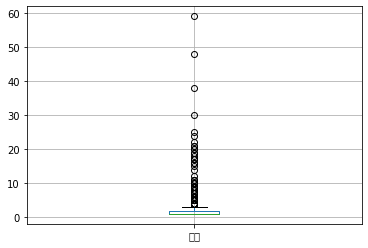

In [52]:
df[['빈도']].boxplot()

In [53]:
import folium

In [54]:
type(df.빈도[0])

numpy.int64

In [55]:
Mt_Hanla = [33.3625, 126.533694]
map = folium.Map(location=Mt_Hanla, zoom_start=11)

for i in df.index:
    folium.CircleMarker(
        radius=int(df.빈도[i]),               # int64는 처리 불가
        location=[df.위도[i], df.경도[i]],    # 위도, 경도
        popup=folium.Popup(df.공식명칭[i], max_width=200),
        tooltip=df.공식명칭[i],
        color='red'
    ).add_to(map)

title = '<h3 align="center" style="font-size:20px">제주도 핫 플레이스</h3>'
map.get_root().html.add_child(folium.Element(title))
map

In [56]:

map.save('제주도 핫플레이스(개별).html')

In [57]:
from folium.plugins import MarkerCluster

locations, names = [], []
for i in df.index:
    locations.append([df.위도[i], df.경도[i]])
    names.append(df.공식명칭[i])

In [58]:
map = folium.Map(location=Mt_Hanla, zoom_start=11)
MarkerCluster(
    locations=locations, popups=names,
    name='제주', overlay=True, control=True
).add_to(map)
title = '<h3 align="center" style="font-size:20px">제주도 핫 플레이스</h3>'
map.get_root().html.add_child(folium.Element(title))
map

In [59]:
map.save('제주도 핫플레이스(그룹).html')